In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
mnist

<module 'keras.datasets.mnist' from '/mnt/c/dev/dar/myenv/lib/python3.6/site-packages/keras/datasets/mnist.py'>

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
input_shape

(28, 28, 1)

In [9]:
x_train[0, :, :, 0].shape

(28, 28)

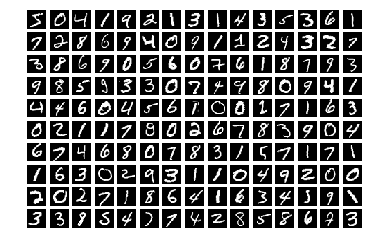

In [10]:
for i in range(150):
    plt.subplot(10, 15, i+1)
    plt.imshow(x_train[i, :, :, 0], cmap='gray')
    plt.axis('off')
    # plt.title(y_train[i])

In [11]:
mask_4_or_5 = (y_train == 4) | (y_train == 5)

In [12]:
mask_4_or_5

array([ True, False,  True, ...,  True, False, False])

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:


x_4_or_5 = x_train[mask_4_or_5]



In [15]:
x_4_or_5.shape

(11263, 28, 28, 1)

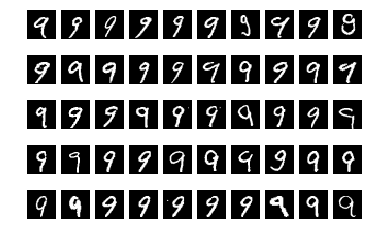

In [16]:
mask = y_train == 9
x_digit = x_train[mask]
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_digit[i, :, :, 0], cmap='gray')
    plt.axis('off')
    # plt.title(y_train[i])

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [18]:
x_train[0, 10:14, 10:14, 0]

array([[0.00392157, 0.6039216 , 0.99215686, 0.3529412 ],
       [0.        , 0.54509807, 0.99215686, 0.74509805],
       [0.        , 0.04313726, 0.74509805, 0.99215686],
       [0.        , 0.        , 0.13725491, 0.94509804]], dtype=float32)

In [19]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
labels = set(y_train)
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [21]:
num_classes = len(labels)
num_classes

10

In [22]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy'])

In [26]:
batch_size = 128
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.2650 - acc: 0.9191 - val_loss: 0.0568 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0869 - acc: 0.9744 - val_loss: 0.0405 - val_acc: 0.9874
Epoch 3/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0653 - acc: 0.9804 - val_loss: 0.0346 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0525 - acc: 0.9845 - val_loss: 0.0372 - val_acc: 0.9869
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0464 - acc: 0.9861 - val_loss: 0.0291 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0399 - acc: 0.9881 - val_loss: 0.0294 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 184s 3ms/step - 

In [27]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

/mnt/c/dev/dar/myenv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Error when checking input: expected dense_3_input to have 2 dimensions, but got array with shape (40000, 28, 28, 1)